# CNN 모델 학습 시각화
## 은닉층 출력(Activation) 시각화

## Import Tensorflow & Keras

* TensorFlow Version 지정

In [0]:
%tensorflow_version 1.x
import tensorflow as tf

tf.__version__

'1.15.0'

* Keras Version 확인

In [0]:
import keras

keras.__version__

Using TensorFlow backend.


'2.2.5'

# I. Google Drive Mount
* 'dogs_and_cats_small' 디렉토리를 구글드라이브에 업로드

In [0]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


* 마운트 결과 확인

In [0]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/datasets/dogs_and_cats_small

total 12
drwx------ 2 root root 4096 Sep 12 03:18 test
drwx------ 2 root root 4096 Sep 12 03:18 train
drwx------ 2 root root 4096 Sep 12 03:18 validation


# II. 사전 학습된 모델 사용

> ## 1) Model Load

* 003_dogs_and_cats_augmentation.h5

In [0]:
from keras.models import load_model

model = load_model('/content/drive/My Drive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

> ## 2) Model Summary

In [0]:
model.summary()

Model: "SimpleCNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       14

# III. 시각화용 고양이 이미지

> ## 1) 고양이 이미지 선택

* /datasets/cats_and_dogs_small/test/cats/cat.1700.jpg

In [0]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small/test/cats/cat.1700.jpg'

img = image.load_img(img_path, target_size=(150, 150))

> ## 2) Image Reshape & Normalization

In [38]:
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)

img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


> ## 3) Visualization

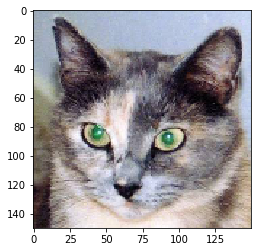

In [39]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

# IV. 상위 8개 Layer 추출

> ## 1) 입력에 대해 8개 층의 출력을 반환하는 모델

In [0]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)

> ## 2) activation_model Summary

In [41]:
activation_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5_input (InputLayer)  (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0   

# V. activation_model 적용

> ## 1) predict( )

In [0]:
activations = activation_model.predict(img_tensor)

> ## 2) First Layer
* 148 x 148 Feature_Map with 32_Channels

In [43]:
first_layer_activation = activations[0]

print(first_layer_activation.shape)

(1, 148, 148, 32)


> ## 3) 27_Feature_Map

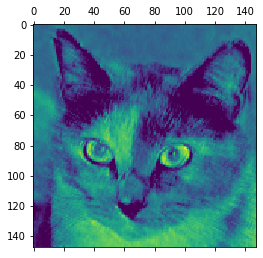

In [45]:
plt.matshow(first_layer_activation[0, :, :, 26], cmap='viridis')
plt.show()

> ## 4) 30_Feature_Map

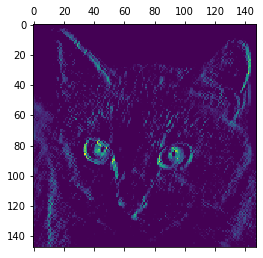

In [46]:
plt.matshow(first_layer_activation[0, :, :, 29], cmap = 'viridis')
plt.show()

> ## 5) 05_Feature_Map

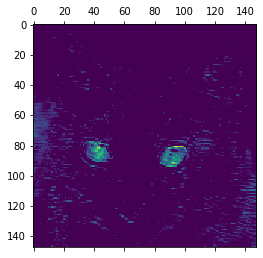

In [83]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap = 'viridis')
plt.show()

> ## 6) 07_Feature_Map

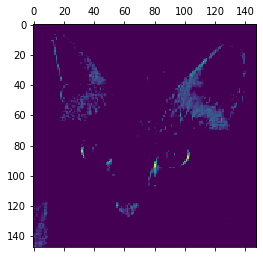

In [84]:
plt.matshow(first_layer_activation[0, :, :, 6], cmap = 'viridis')
plt.show()

# VI. 전체 레이어 특징 추출

> ## 1) drawFeatureMap( ) 정의

In [0]:
def drawFeatureMap(activations):
  # Layer 이름을 그래프 제목으로 사용
  layer_names = []
  for layer in model.layers[:8]:
      layer_names.append(layer.name)

  images_per_row = 16
  
  for layer_name, layer_activation in zip(layer_names, activations):
      # 특성 맵에 있는 특성의 수
      n_features = layer_activation.shape[-1]

      # 특성 맵의 크기 (1, size, size, n_features)
      size = layer_activation.shape[1]

      # 활성화 채널을 위한 그리드 크기 계산
      n_cols = n_features // images_per_row
      display_grid = np.zeros((size * n_cols, images_per_row * size))

      # 각 활성화를 하나의 큰 그리드 채우기
      for col in range(n_cols):
          for row in range(images_per_row):
              channel_image = layer_activation[0,
                                               :, :,
                                               col * images_per_row + row]
              # 그래프로 나타내기 좋게 특성을 처리
              channel_image -= channel_image.mean()
              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')
              display_grid[col * size : (col + 1) * size,
                           row * size : (row + 1) * size] = channel_image

      # 그리드 출력
      scale = 1. / size
      plt.figure(figsize=(scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
      plt.title(layer_name)
      plt.grid(False)
      plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

  plt.show()

> ## 2) drawFeatureMap( ) 실행

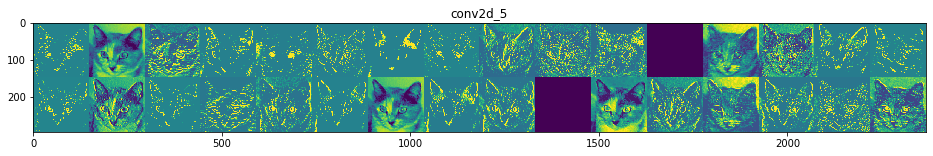

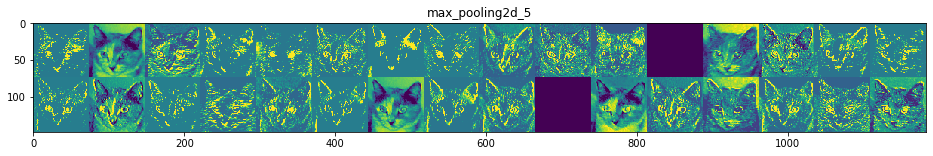

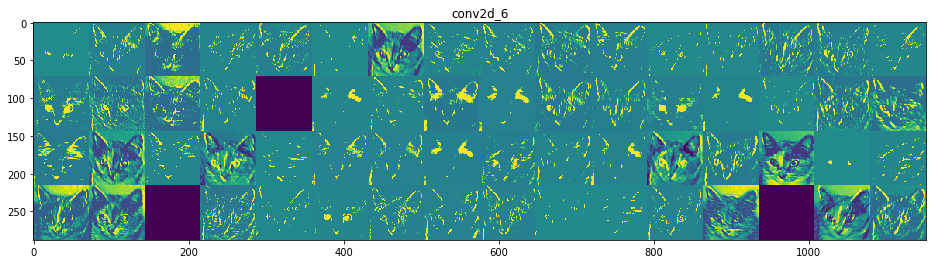

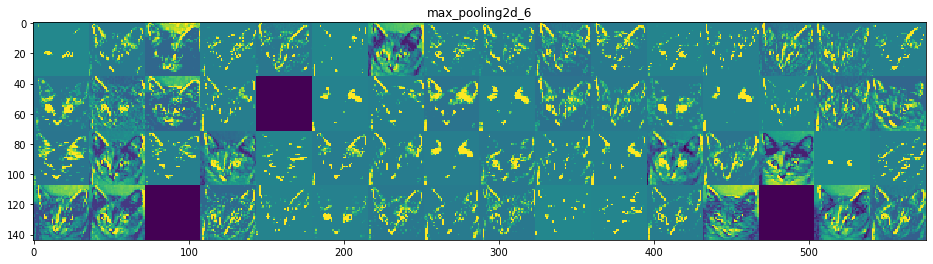

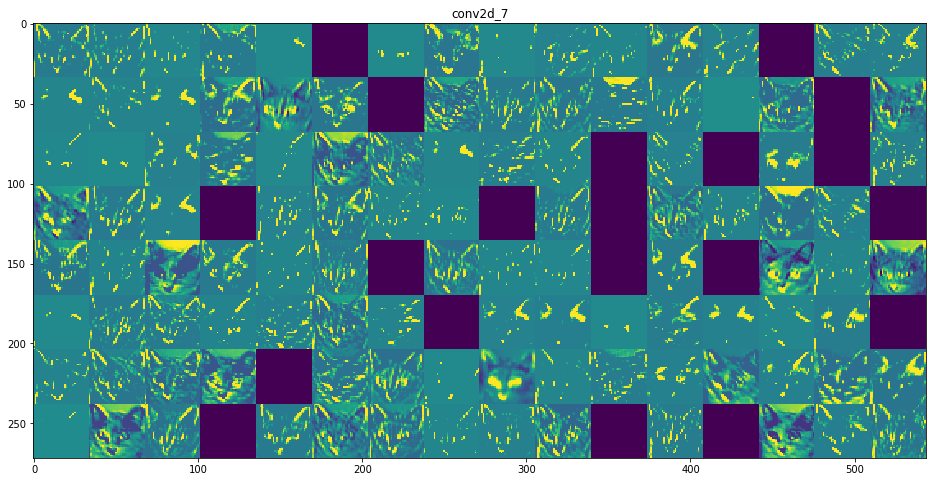

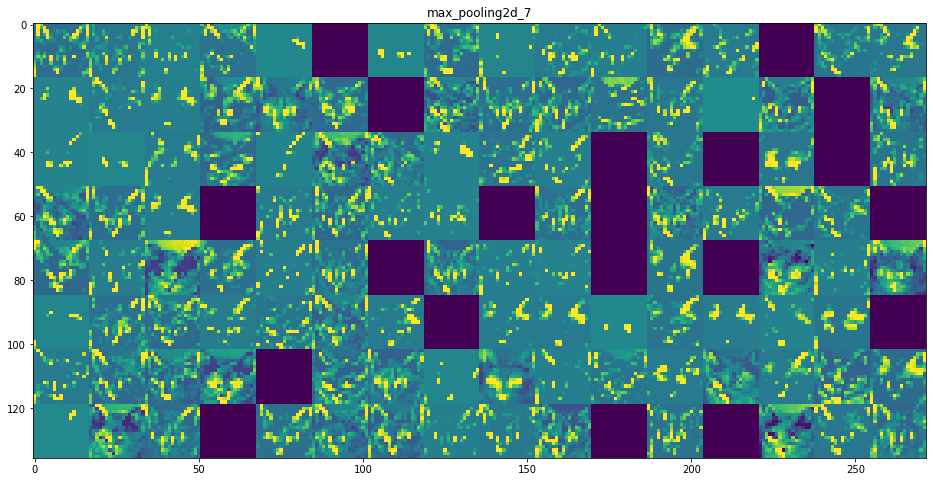

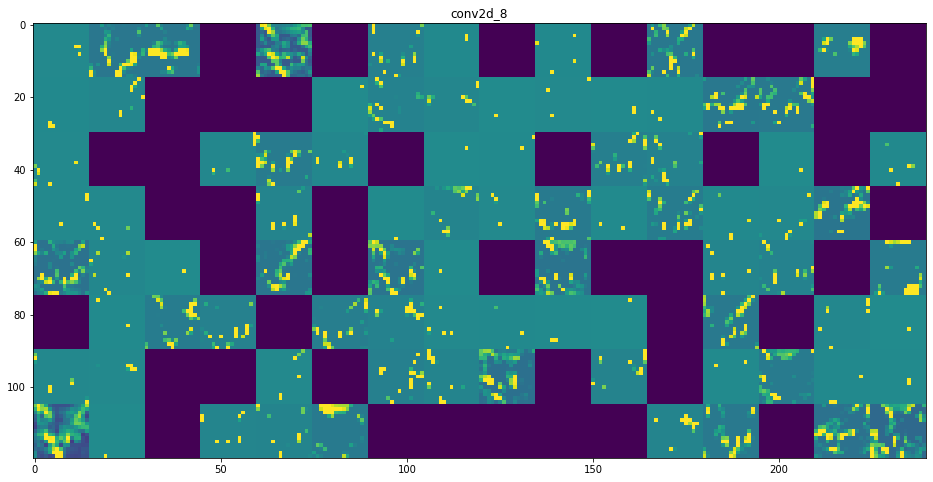

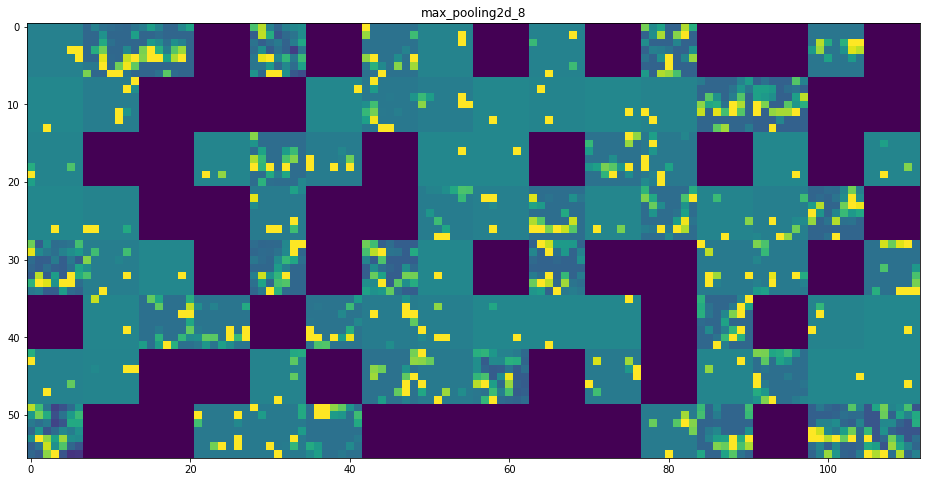

In [0]:
drawFeatureMap(activations)

# 
# 
# 
# The End
# 
# 
# 